In [1]:
import drawsvg as dw
%load_ext jhmagics

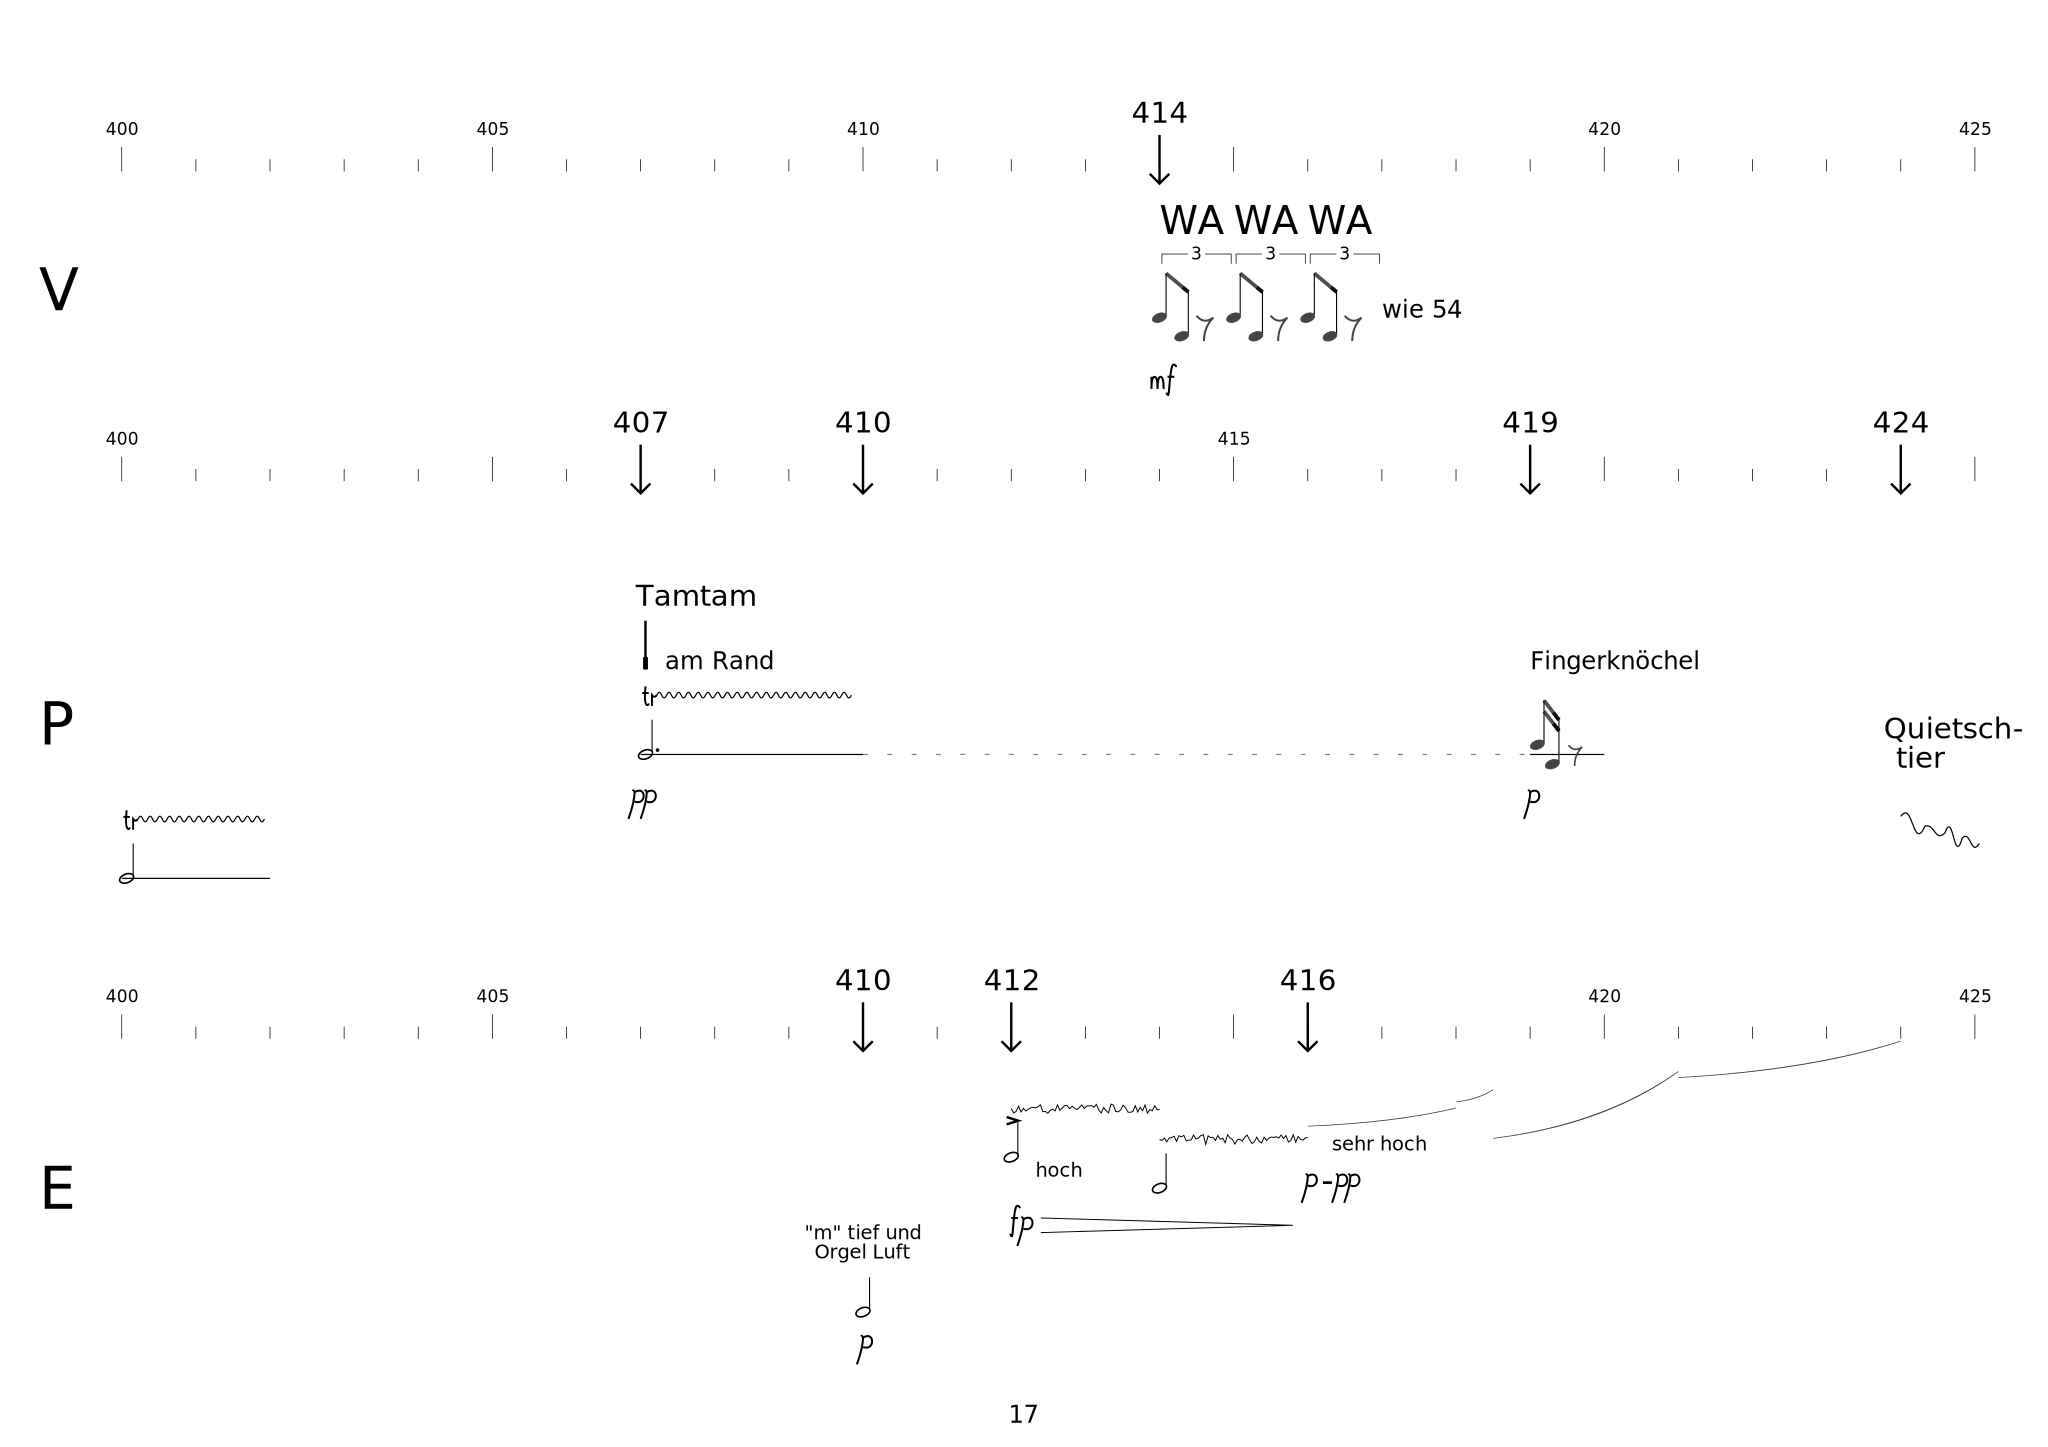

In [73]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# seitenzahl
seite = 17
d.append(dw.Text('%d'%seite,10,w/2,h-10,text_anchor='middle'))

# page settings
xnum,ynum = 26,22 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 50,30,30,30
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

# load own functions
from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# custom functions for xgrid and ygrid for this page
def xg(indx):
    return xgrid(indx,tm0)
def yg(indx):
    return ygrid(indx)
    
# raster am rand zur orientierung
#showGridOnMargins()
#showWritingSpace()

# zeitleisten und instrumente links
tm0 = 400  # zeit am anfang dieser seite
off = 15 # offset für die striche
 # normale zahlen in V P E
norm = [[400,405,410,420,425],[400,415],[400,405,420,425]]
 # events in V P E
event = [[414],[407,410,419,424],[410,412,416]]
 # ygrid positionen für die leisten
yleisten = [1,6,15]
 # instrumente 
insnamen = ['V','P','E']
ytimeplus = [*yleisten,ynum-1]
yposinsnamen = [ytimeplus[i]+(ytimeplus[i+1]-ytimeplus[i])/2 for i in range(3)]
 # write out
for l in range(3):
    y = ygrid(yleisten[l])
    text(insnamen[l],xgrid(0)-34,ygrid(yposinsnamen[l]),24,dominant_baseline='middle')
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.3)
        else: vline(x,y+off,-5,sw=.3)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,7,text_anchor='middle')
        elif (i+tm0) in event[l]:
            text('%d'%(i+tm0),x,y-5,12,text_anchor='middle')
            arrow(x,y,20,4)

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

            
################# VOICE #################

 # wa
x = xg(414)
ygindxvtop = yleisten[0]+.8
ygindxtext = ygindxvtop+.8 #text basline
y = yg(ygindxvtop+2.3)
y1 = yg(ygindxvtop+2.15)
y2 = yg(ygindxvtop+2.45)
yy = y-30
for i in range(3):
    text('WA',xg(414+i),yg(ygindxtext),16)
    gruppe([xg(414+i),y1,xg(414.3+i),y2],y_space=notsiz)
    paus8tel(xg(414.6+i),y,pausiz+1)
    nlet(xg(414+i),yy,xg(415+i),yy)
text('wie 54',xg(417),ygrid(ygindxvtop+2.15),10,font_family='Cantarell Light',font_style='italic')
mezzoforte(x,yg(ygindxtext+2.5),dynsiz)


################# PERCUSSION #################

 # linien und instrumente
ypercindx = yleisten[1]
yloffsets = [7,5,5] #abstände der linien von der perc zeitleiste
yltemp,yltam,yltam2 = [i+ypercindx for i in yloffsets]
ypercinstrs = [yltemp,yltam,yltam2]
startends = [400,402,407,410,419,420]
insnamen = ['','Tamtam','']
yoffsetins = [2,2.4,2] #abstand der namen von den linien
for i,yl in enumerate(ypercinstrs):
    y = yg(yl)
    x1 = xg(startends[i*2])
    x2 = xg(startends[i*2+1])
    line(x1,y,x2,y,stroke_width=0.5)
    text(insnamen[i],x1-2,yg(yl-yoffsetins[i]),12,font_family='Cantarell')    

 # tempelblock
x = xg(400)
y = yg(yltemp)
yy = y-20
triller(x+2,yy,xg(401.9),8)
not2tel(x+2,y,nothals,notsiz)

 # tamtam
x = xg(407)
y = yg(yltam)
yy = y-55
percDrumstick(x+2,yy)
yy = y-20
text('am Rand',x+10,yy-15,10,font_family='Cantarell Light')
triller(x+2,yy,xg(409.9),8)
not2tel(x+2,y,nothals,notsiz,dotted=1)
yy = y+20
pianissimo(x,yy,dynsiz)

hline(xg(410),y,xunit*9,sw=.5,c='gray',stroke_dasharray='2 8')

 # tamtam2
x = xg(419)
y = yg(yltam)
yy = y-20
text('Fingerknöchel',x,yy-15,10,font_family='Cantarell Light')
gruppe([x+3,y-4,xg(419.3),y+4],2,y_space=notsiz)
paus8tel(xg(419.6),y,pausiz)
yy = y+20
piano(x,yy,dynsiz)

 # quietsche entchen
x = xg(424)
y = yg(yltam+1)
yy = y-20
text('Quietsch-',x-7,yy-12,12,font_family='Cantarell')    
text('tier',x-2,yy,12,font_family='Cantarell')
from random import seed
seed(13)
varVibr2_l(x,y,xg(425),y+10,hmin=3,hmax=13,prdmin=5,prdmax=15,sw=.5)


################# ELEKTRONIK #################

# 410
x = xg(410)
y = yg(20)
yy = y-30
text(['"m" tief und','Orgel Luft'],x,yy,8,font_family='Cantarell Light',
    font_style='italic',text_anchor='middle')
not2tel(x,y,nothals,notsiz)
yy = y+15
piano(x,yy,dynsiz)

# 412
x = xg(412)
y = yg(17.5)
not2tel(x,y,nothals,notsiz)
accent(x,y-15,6)
text('hoch',x+10,y+8,8,font_family='Cantarell Light',font_style='italic')
yy = y-20
kratzgliss(x,yy,xg(414),yy,h=2)
yy = y+30
fortepiano(x,yy,dynsiz)
dim(xg(412.4),yy-2,xg(415.8),yy-2,6)
x = xg(414)
y = yg(18)
not2tel(x,y,nothals,notsiz)
yy = y-20
kratzgliss(x,yy,xg(416),yy,h=2)

# 416
y = yg(17)
x = xg(416)
iPch_1 = [76,80,74,84] #von csound
iPch_2 = [79,82,85,90]
ydiff1 = [(i-76)*2.5 for i in iPch_1]
ydiff2 = [(i-76)*2.5 for i in iPch_2]
xstart = [416,418,418.5,421]
xend = [418,418.5,421,424]
for i in range(4):
    glisscurve(xg(xstart[i]),y-ydiff1[i],xg(xend[i]),y-ydiff2[i],sw=.3,sdiff=.3,c='#444')
yy = y+10
text('sehr hoch',x+10,yy,8,font_family='Cantarell Light',font_style='italic')
yy = y+25
piano(x,yy,dynsiz)
text('-',x+5.5,yy+2)
pianissimo(x+15,yy,dynsiz)


d.set_pixel_scale(4)
d.save_png('partitur_%02d.png'%seite)
d.save_svg('partitur_%02d.svg'%seite)
d

In [54]:
help(glisscurve)

Help on function glisscurve in module __main__:

glisscurve(x=10, y=90, xend=100, yend=10, c='black', sw=1, sdiff=1, **args)
    sw = stroke-width
    sdiff ist effektiv die dicke der linie in der mitte

